<a href="https://colab.research.google.com/github/devparikh0506/DATA_690_Deep_Learning/blob/main/week_2/image_compressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework

### Part A: An application of SVD - image compression

[Source](https://numpy.org/numpy-tutorials/content/tutorial-svd.html)


Using the above-mentioned source, make an image compressor using Python classes.

##### The following is the sample code only. You can write your Python code in any way you like. But you need to create a Python class and use the class. In other words, your code needs to follow OOP.

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [26]:
class ImageCompressor:
  def __init__(self, image):
    """any variables needed to be initialized.
    """
    self.image = Image.open(image)
    self.image_arr = np.array(self.image)
    self.shape = self.image_arr.shape
    self.U = []
    self.S = []
    self.VT = []
    for i in range(3):  # RGB channels
        U, S, VT = np.linalg.svd(self.image_arr[:,:,i], full_matrices=False)
        self.U.append(U)
        self.S.append(S)
        self.VT.append(VT)
    self.k = 50 #Default compression level

  def display_image(self, image_to_display, title="Original Image"):
    """display the image: original or compressed."""
    plt.figure(figsize=(10, 8))
    plt.imshow(image_to_display)
    plt.axis('off')
    plt.title(title)
    plt.show()


  def compress(self):
    """implement SVD for image compress.
    """
    compressed = np.zeros(self.shape)
    for i in range(3):  # RGB channels
        compressed[:,:,i] = np.dot(self.U[i][:, :self.k], np.dot(np.diag(self.S[i][:self.k]), self.VT[i][:self.k, :]))
    image_compressed = np.clip(compressed, 0, 255).astype(np.uint8)
    return image_compressed

  def set_compression_level(self, k):
        """Set the compression level (number of singular values to use)."""
        self.k = k

  def get_compression_ratio(self):
        """Calculate and return the compression ratio."""
        original_size = self.shape[0] * self.shape[1] * self.shape[2]
        compressed_size = self.k * (sum(U.shape[0] for U in self.U) + sum(VT.shape[1] for VT in self.VT) + 3)
        return compressed_size / original_size

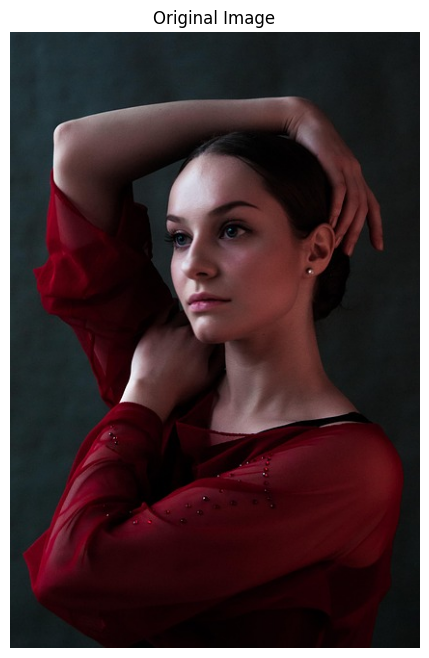

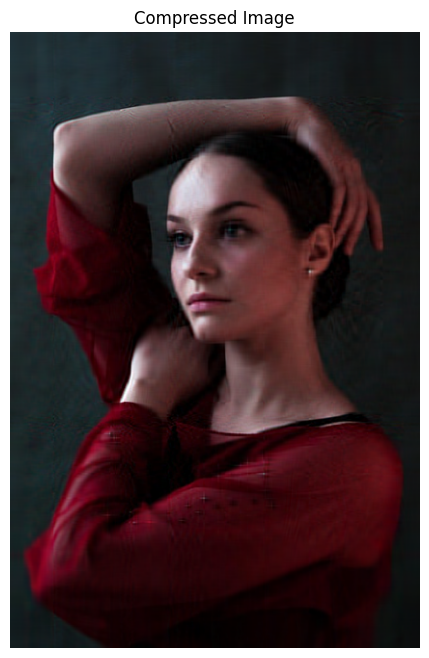

In [27]:
### To show your Python class works as expected.
image = "./my_img.jpg"
# create an instance of ImageCompressor
image_compressor = ImageCompressor(image)
# compress the image
image_compressed = image_compressor.compress()
# display original image and compressed image
image_compressor.display_image(image_compressor.image)
image_compressor.display_image(image_compressed, "Compressed Image")


### Part B: Show the intermediate steps of get derivative function of sigmoid function

Sigmoid function: $$\sigma(x) = \frac{1}{1+e^{-x}}$$


The derivative func of Sigmoid function: $$\frac{d\sigma(x)}{dx} = \left( 1 - \sigma(x) \right) \sigma(x)$$


Questions: show intermediate steps of how to get the derivative func of sigmoid.

1. Applying quotient rule:

$$\frac{d}{dx}\left[\frac{u(x)}{v(x)}\right] = \frac{u'(x)v(x) - u(x)v'(x)}{[v(x)]^2}\\
\text{ Where } u(x) = 1 \text{ and } v(x) = 1 + e^{-x} $$

2. Calculating $u'(x)$ and $v'(x)$:

$$ u'(x) = 0 \\ v'(x) = -e^{-x} $$

3. Substituting values into formula:

$$ \frac{d\sigma(x)}{dx} = \frac{0 \cdot (1 + e^{-x}) - 1 \cdot (-e^{-x})}{(1 + e^{-x})^2} $$

4. Simplifying:

$$ \frac{d\sigma(x)}{dx} = \frac{e^{-x}}{(1 + e^{-x})^2} $$

6. Rewriting in terms of $\sigma(x)$:

$$ \frac{d\sigma(x)}{dx} = \sigma(x) \cdot \frac{e^{-x}}{1 + e^{-x}} $$

7. Simplifying:

$$ \frac{d\sigma(x)}{dx} = \sigma(x) \cdot \left(1 - \frac{1}{1 + e^{-x}}\right) \\ $$

$$ \frac{d\sigma(x)}{dx} = \sigma(x) \cdot (1 - \sigma(x)) $$

8. Finally:

$$ \frac{d\sigma(x)}{dx} = \sigma(x)(1 - \sigma(x)) $$